## Imports

In [1]:
# RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

# Import libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3


    
# PART 1: Predicting the selling price of cars on CarDekho.com


## Overview

According to its website, **CarDekho.com** is India's leading car search venture. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons, as well as videos and pictures of all car brands and models available in India. Each car has a **current selling price**, which is the price for buying a used car on this site, and an **MRP**, which is the retail price of the car. These two prices differ depending on factors such as brand, make year, mileage, condition, etc.  

### Dataset 

The dataset contains 601 used cars and is available as `data/car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a used car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of the car when it was new (in lakhs). 
- **Kms_Driven** - number of kilometers

**NOTE:** 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

### Objective

Using kNN and linear regression we will predict the `Current_Selling_Price` from the other features available in this dataset.



### Question 1: Exploratory data analysis (EDA) 


To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

Identify all variables in the dataset. Which ones are quantitative, and which ones are categorical? If you think any variables are categorical, briefly explain why.


In [2]:
# your code here
# BEGIN SOLUTION NO PROMPT
# Read dataframe from csv file.
df = pd.read_csv("data/car_dekho_full.csv")

# Inspect dataframe
print("Basic information about our CarDekho.com dataset:\n")
print(df.info())
print(
    "\n\nA little more summary info about our data "
    "(there\nare only a few columns in our data, making "
    "this\neasy to inspect):\n\n",
    df.describe(),
)
print("\n\nAnd, the first few rows of our data:")
display(df.head())
# END SOLUTION

Basic information about our CarDekho.com dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   601 non-null    int64  
 1   Current_Selling_Price  601 non-null    float64
 2   MRP                    601 non-null    float64
 3   Kms_Driven             601 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 18.9 KB
None


A little more summary info about our data (there
are only a few columns in our data, making this
easy to inspect):

            Year  Current_Selling_Price      MRP  Kms_Driven
count   601.000                601.000  601.000     601.000
mean   2013.887                  4.393    6.912   33718.745
std       2.721                  4.518    6.480   26846.657
min    2003.000                  0.120    0.320     500.000
25%    2012.000                  1.050    1.470   15000.00

,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000


**INTERPRETATION:**



- `Current_Selling_Price` is a continuous quantitative variable that represents the current market price of the vehicle. 
- `MRP` is a continuous quantitative variable that represents the price of the vehicle when it was new. 
- `Kms_Driven` is a continuous quantitative variable that represents the number of kilometers that have been driven on the vehicle. 
- `Year` can be a little more tricky to determine whether to treat it as a quantitative or categorical variable, and this may vary under different circumstances. In this dataset, for the ways in which we are using it here, **`Year` should be considered to be a discrete quantitative variable.**
  - For instance, the ordering of `Year` is important, particularly when considering (or predicting) the current selling price of a car. Depreciation typically leads to the decreasing value of a vehicle as it ages. In addition, `Year` is likely to have a discernable relationship to other attributes of a car wherein other values change on average as the age of the car increases (i.e. we would expect kilometers driven to increase and would also probably expect MRP to be lower).
  - On the other hand, it is easy to imagine cirsumstances and applications where it will really matter that there is no guarantee that a 2008 Chevy Impala is equally similar to a 2007 Chevy Impala or 2009 Chevy Impala (for instance, some model years just comprise small cosmetic changes or marginal upgrades, while others involve a complete redesign of the vehicle all the way down to the chassis). In that sense, there are circumstances under which you might want to explicitly treat `Year` as a categorical variable. However, this would be very context dependent, and you would likely want to have a very strong reason for doing so.

What are the means and standard deviations for `Current_Selling_Price` and `MRP`?

Store your results in `mean_csp`, `mean_mrp`, `std_csp`, and `std_mrp` to match the variable names used in the provided print function.


In [3]:
mean_csp = df["Current_Selling_Price"].mean() # SOLUTION
mean_mrp = df["MRP"].mean() # SOLUTION
std_csp = df["Current_Selling_Price"].std() # SOLUTION
std_mrp = df["MRP"].std() # SOLUTION

In [4]:
# Be certain to name your variables mean_csp, mean_mrp, std_csp, std_mrp
# to match the variable names used in the provided print function
print(
    "\n"
    f"The mean Current Selling Price is {mean_csp:.4f} lakhs\n"
    f"The mean MRP is {mean_mrp:.4f} lakhs\n"
    f"The Standard Deviation of Current Selling Price is {std_csp:.4f}\n"
    f"The Standard Deviation of MRP is {std_mrp:.4f}"
)


The mean Current Selling Price is 4.3931 lakhs
The mean MRP is 6.9116 lakhs
The Standard Deviation of Current Selling Price is 4.5183
The Standard Deviation of MRP is 6.4801


What is the range of kilometers that the cars have been driven? Store your answer in the variable `km_range`.

**Hint:** 'range' here refers the difference between the highest and lowest recorded kilometers driven.


In [5]:
# your code here
km_min = df["Kms_Driven"].min() # SOLUTION NO PROMPT
km_max = df["Kms_Driven"].max() # SOLUTION NO PROMPT
km_range = km_max - km_min # SOLUTION
# BEGIN SOLUTION NO PROMPT
print(
    f"The range of kilometers for which cars in our dataset "
    f"have been driven is {km_range:,.2f} kms.\n\n"
    f"The maximum number of kilometers is {km_max:,.2f}, "
    f"and the minimum is {km_min:,.2f}."
)
# END SOLUTION

The range of kilometers for which cars in our dataset have been driven is 212,500.00 kms.

The maximum number of kilometers is 213,000.00, and the minimum is 500.00.


In [6]:
# check your result
print(f"the range of kilometers is {km_range:,.2f}")

the range of kilometers is 212,500.00


The goal in this section is to identify the best feature to use to predict our response, `Current_Selling_Price`. 

- Plot a scatter plot of each feature and our reponse and examine any relationships.
- Which is the predictor that seems to best predict `Current_Selling_Price`? Provide an interpretation of the plots that justifies your choice.


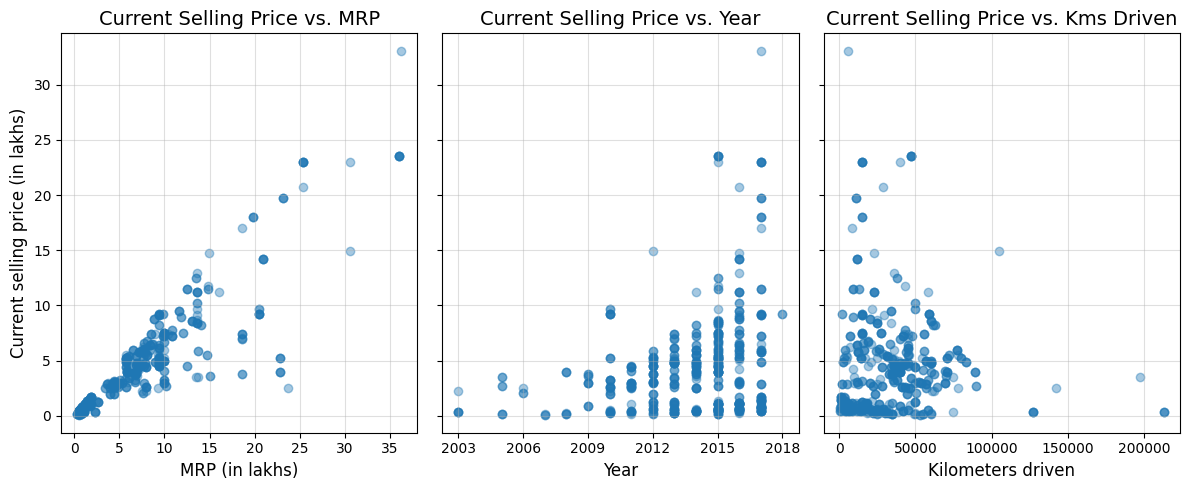

In [7]:
# your code here
# BEGIN SOLUTION NO PROMPT
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(12, 5))

fontsize = 14

cols = ["MRP", "Year", "Kms_Driven"] 
title_vs_text = ["MRP", "Year", "Kms Driven"]
xlabels = ["MRP (in lakhs)", "Year", "Kilometers driven"]

for i, (ax, col, title_vs, xlabel) in enumerate(
    zip(axes, cols, title_vs_text, xlabels)
):

    ax.scatter(df[col], df["Current_Selling_Price"], alpha=0.4)
    ax.set_title(
        f"Current Selling Price vs. {title_vs}",
        fontsize=fontsize,
    )
    ax.set_xlabel(xlabel, fontsize=fontsize-2)
    ax.set_ylabel(
        "Current selling price (in lakhs)" if i==0 else None, 
        fontsize=fontsize-2
    )
    ax.grid(":", alpha=0.4)
    
    if col=="Year":
        min_year = df[col].min()
        max_year = df[col].max()
        ax.set_xticks(np.arange(min_year, max_year+1, 3))

plt.tight_layout()
# END SOLUTION

**INTERPRETATION:**


There appears to be a positive and somewhat linear relationship between MRP and Current Selling Price. There is a pattern in the plot of Year and Current Selling Price, where we can see that the Current Selling Price, on average, increases with Year. And, for Kilometers Driven, we can see an overall decreasing trend in its relationship with Current Selling Price. However, Kilometers Driven does appear to be the weakest relationship among all of our potential predictors.

Based on the graphs, MRP seems to be the best predictor for predicting `Current_Selling_Price`. It exhibits a strong positive relationship.


### Question 2:   k-Nearest Neighbors

We will begin our modeling with k-Nearest Neighbors (kNN) regression, using `sklearn` for both preprocessing and model fitting.

Split the dataset into a train and test set with 75% training data and 25% testing data, using argument `random_state = 109`. The resulting splits should be stored in the variables `X_train`, `X_test`, `y_train`, `y_test`.



In [8]:
# your code here
# BEGIN SOLUTION NO PROMPT
# Save x and y values to separate arrays prior to splitting
y = df['Current_Selling_Price'].values

# Also, reshape x array to 2D so that it works with sklearn models
X = df['MRP'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=109)
# END SOLUTION

Now, we will fit several kNN regression models for various values of $k$ to identify the best parameterization.

For each $k$ in $k \in [1,2,3,5,7,10,50,100]$, fit a k-NN regression model to the training data with response `Current_Selling_Price` and the predictor `MRP`. 
  - For each $k$, make a plot of reponse vs. predictor (8 plots in total, arranged in a 4×2 grid). 
  - Each of your 8 plots should clearly show (a) the training data and the testing data in different colors, (b) the model prediction, and (c) title, legend, and axis labels.
  - **NOTE:** Feel free to use the `plt.subplots()` code we provide to specify your 4x2 grid, unless you first try that and decide that you have a clearer, cleaner way of accomplishing this task. 


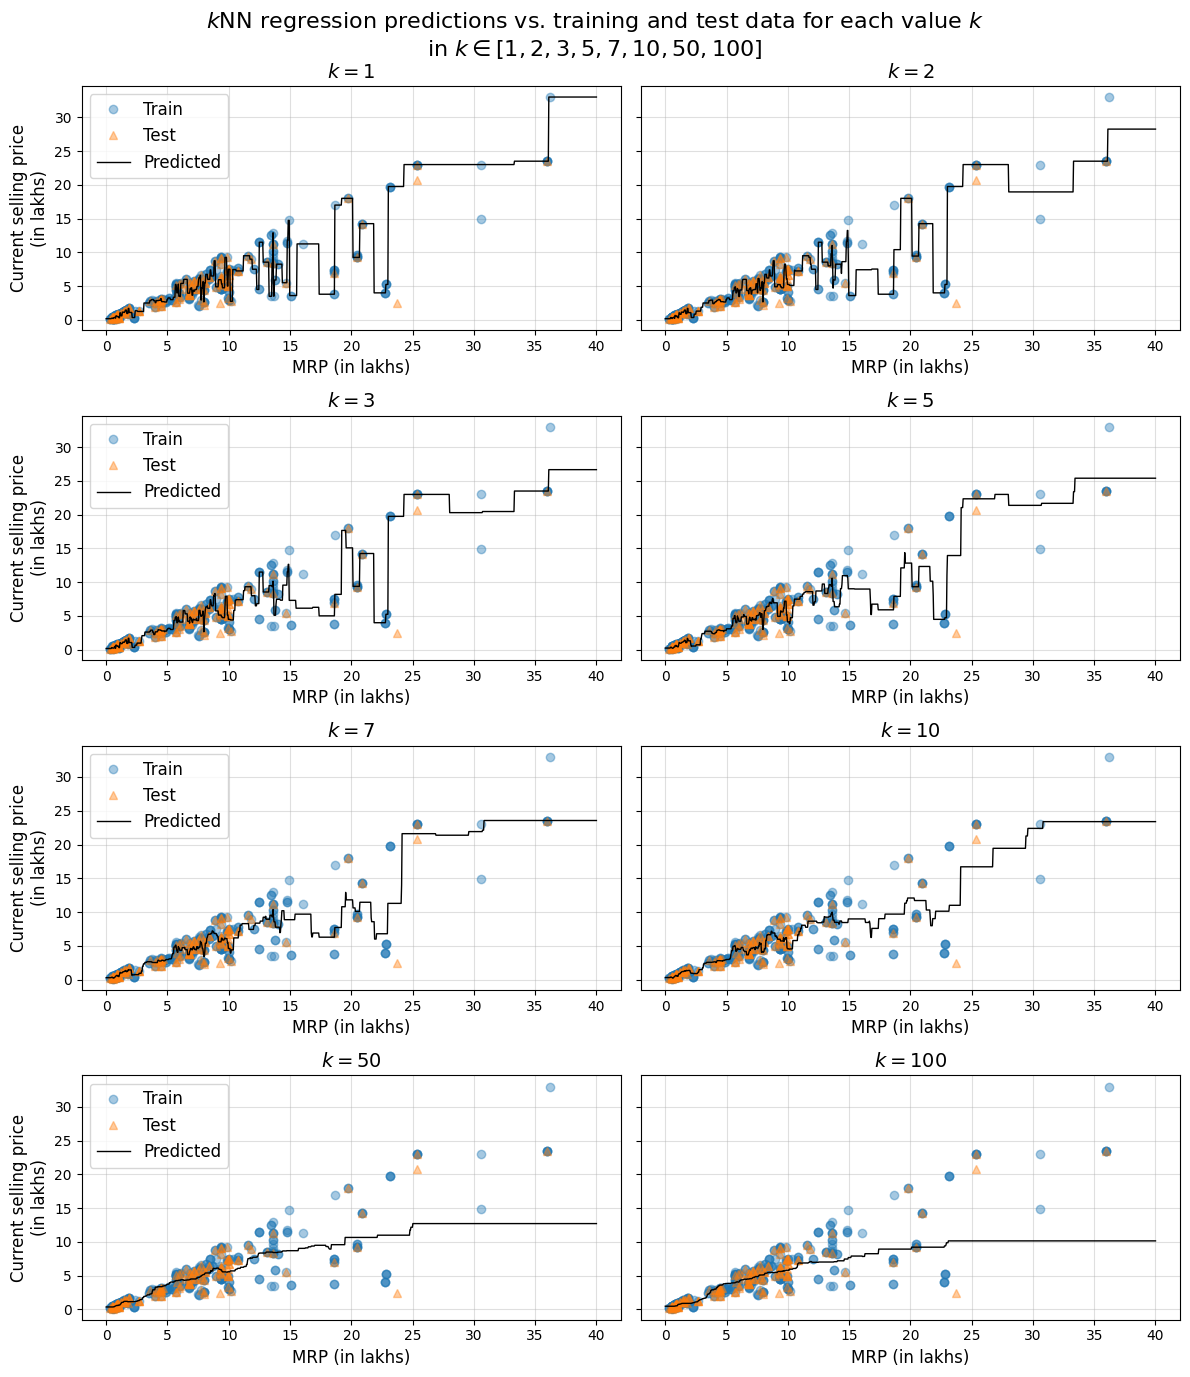

In [9]:
# fig, axs = plt.subplots(4,2, figsize=(12, 14))
# fig.subplots_adjust(hspace = .5, wspace=.3)
# your code here
# BEGIN SOLUTION NO PROMPT
# Generate our subplots axes
fig, axs = plt.subplots(4,2, sharey=True, figsize=(12, 14))

# Define our list of k values
K = [1,2,3,5,7,10,50,100]

# Set the base fontsize for our plotting code below
fontsize = 14

# Create our empty lists for storing MSE values
mse_train = []
mse_test = []

# Title our overall set of subplots
plt.suptitle(
    "$k$NN regression predictions vs. training and test data for each "
    "value $k$\nin $k \in {}$".format(K),
    fontsize=fontsize+2
)

# Flatten our axes object to make it easier to work with in our loop
axs = axs.ravel()

# Loop over the k-values
for i, k in enumerate(K):

    # Instantiate and fit a kNN regressor class object
    knn_model = KNeighborsRegressor(n_neighbors=k) 
    knn_model.fit(X_train, y_train) 

    # Predict on training data with our fitted kNN class object
    predicted_price_train = knn_model.predict(X_train)

    # Predict on test data with our fitted kNN class object
    predicted_price_test = knn_model.predict(X_test) 
    Xline = np.linspace(0, 40, 1000).reshape(-1, 1)

    # Evaluate and append the MSE for our training data
    mse_train.append( mean_squared_error(y_train, predicted_price_train)) 

    # Evaluate and append the MSE for our test data
    mse_test.append( mean_squared_error(y_test, predicted_price_test)) 
    
    # Plot our training and test data
    axs[i].plot(X_train, y_train, "o", alpha=0.4, label="Train")
    axs[i].plot(X_test, y_test, "^", alpha=0.4, label="Test")
    
    # Plot our knn regression curve
    axs[i].plot(
        Xline,
        knn_model.predict(Xline),
        label="Predicted",
        color="black",
        linewidth=1
    )
    
    # Set labels add legends, and add gridlines for easier interpretation
    axs[i].set_title("$k = " + str(k) + "$", fontsize=fontsize)
    axs[i].set_xlabel("MRP (in lakhs)", fontsize=fontsize-2)
    
    if i%2==0:
        axs[i].set_ylabel(
            "Current selling price\n(in lakhs)", fontsize=fontsize-2
        )
        axs[i].legend(fontsize=fontsize-2)
    
    axs[i].grid(":", alpha=0.4)
    
plt.tight_layout()
# END SOLUTION

Plot the training and test $MSE$ values as a function of $k$ (1 plot in total).



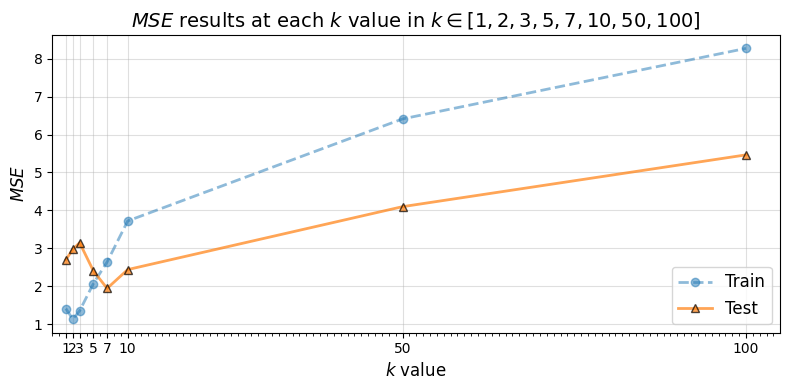

In [10]:
# your code here
# BEGIN SOLUTION NO PROMPT
fig, ax = plt.subplots(1,1, figsize=(8, 4))
ax.plot(K, mse_train, "o--", label="Train", linewidth=2, alpha=0.5)
ax.plot(
    K, mse_test, "^-", label="Test", linewidth=2, markeredgecolor="k", alpha=0.7
)
ax.set_xticks(K)
ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))
ax.set_xlim(-1)
ax.set_xlabel(r"$k$ value", fontsize=12)
ax.set_ylabel("$MSE$", fontsize=12)
ax.set_title(
    r"$MSE$ results at each $k$ value in $k \in {}$".format(K),
    fontsize=14
)
ax.legend(fontsize=12, loc=4)
ax.grid(":", alpha=0.4)

plt.tight_layout()
# END SOLUTION

Find the best model based on the test $MSE$ values. Store the best $k$-value in `best_k` and the best test $MSE$ in `best_mse`.



In [11]:
# your code here
# BEGIN SOLUTION NO PROMPT
#Find the minimum test MSE
best_mse = mse_test.index(min(mse_test))

#Find the k value associated to the lowest MSE
# END SOLUTION
best_k = K[best_mse] # SOLUTION
best_mse = min(mse_test) # SOLUTION

In [12]:
print(
    f"The best k value is {best_k}. This corresponds to the "
    f"lowest test MSE of {best_mse:.3f}."
)

The best k value is 7. This corresponds to the lowest test MSE of 1.940.


Evaluate and report the $R^2$ of the best model. Save the $R^2$ of the best model in `best_r2`.


In [13]:
# your code here
# BEGIN SOLUTION NO PROMPT
# Instantiate a kNN model class object for our best k value
knn_model = KNeighborsRegressor(n_neighbors=best_k) 

# Fit the model using the fit method of our kNN model class object
knn_model.fit(X_train, y_train) 

# Predict on train using the predict method of our fitted kNN class object
predicted_price_train = knn_model.predict(X_train)

# Predict on test using the predict method
predicted_price_test = knn_model.predict(X_test) 

# Evaluate R^2 using our test predictions
# END SOLUTION
best_r2 = r2_score(y_test, predicted_price_test) # SOLUTION

In [14]:
print(
    f"The R-squared score evaluated on the test set for the best model "
    f"with k={best_k} is {best_r2:.4f}."
)

The R-squared score evaluated on the test set for the best model with k=7 is 0.8796.


How does the value of $k$ affect the fitted model?



The lower the value of $k$, the more closely fit the model will be to our training data. For instance, $k=1$ fits (or, more accurately "overfits") the data at every value $x$ contained in our training data. As the values of $k$ increases, the curve becomes smoother, until we reach $k=n$ for the $n$ values contained in the training data. At that point the $k$NN model with simply predict the mean observed training value $y$ at all values of $x$.

If $n$ is the number of observations in the training set, what can you say about a kNN regression model that uses $k = n$?  





If $k=n$, all points will receive the same predicted value. That predicted value will be equal to the mean $y$ value of our training observations.

Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.





Yes, the train and test plots of $MSE$ do exhibit different trends. For small values $k$, the model overfits the data. Therefore, it achieves a very good $MSE$ on the training set and a poor $MSE$ on the test data. Larger values $k$ decrease overfitting on the training data, hence the training $MSE$ increases as the $k$ value increases, while the test $MSE$ decreases until the point at which it reaches $k=7$. But too large a $k$ does not allow for sufficient variation in predictions for an accurate set test predictions, so the test $MSE$ only decreases to a point and then it begins to increase again.

If you were to change the `random_state` argument to `train_test_split` above and re-run the code, do you think would select the same model? If not, why?





No, the answer varies each time. This is attributable to the variation in train and test data due to the random split. In other words, our model fits to a different set of training data and predicts on a different set of test data with each different random state used when splitting the data. This leads to instances where our $R^2$ result changes with each split and can also lead to slight variation in our optimal value $k$ in more extreme circumstances. 

### Question 3:  Simple linear regression



We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables you used in the kNN model. You will also use the same 75% training and 25% testing split of the data, which was created using `random_state = 109`.

Fit a linear regression model. Name your model `linreg`.


In [15]:
# your code here
# Instantiate a LinearRegression class object and fit with train data
linreg = LinearRegression().fit(X_train, y_train) # SOLUTION

Report the slope and intercept values for the fitted linear model. Name your variables `slope` and `intercept`.


In [16]:
# your code here
slope = linreg.coef_[0] # SOLUTION
intercept = linreg.intercept_ # SOLUTION

In [17]:
print(
    f"Intercept of the fitted linear model\t\t{slope:.4f}\n"
    f"Slope of the fitted linear model\t{intercept:.4f}"
)

Intercept of the fitted linear model		0.6157
Slope of the fitted linear model	0.1124


Report the $MSE$ for the training and test sets and the $R^2$ for the test set. Name your variables `lin_train_mse`, `lin_test_mse`, and `lin_test_r2`.



In [18]:
# your code here 
# BEGIN SOLUTION NO PROMPT
# Use predict method for fitted model object to predict on train
y_train_pred = linreg.predict(X_train)

# Use predict method to predict on the test
y_test_pred = linreg.predict(X_test)
# END SOLUTION
#Compute the MSE of the model
lin_train_mse = mean_squared_error(y_train, y_train_pred) # SOLUTION
lin_test_mse = mean_squared_error(y_test, y_test_pred) # SOLUTION
#Compute the R-squared of the model
lin_test_r2 = r2_score(y_test, y_test_pred) # SOLUTION

In [19]:
print("Linear regression model results:\n")
print(
    "\tTrain MSE\t{:.4f}\n"
    "\tTest MSE\t{:.4f}\n".format(
        lin_train_mse,
        lin_test_mse,
    )
)

print(f"\tTest R-squared\t{lin_test_r2:.4f}")

Linear regression model results:

	Train MSE	4.7133
	Test MSE	3.1362

	Test R-squared	0.8053


Plot the **residuals**, $e = y - \hat{y}$, of the model on the **training** set as a function of the **response** variable. Draw a horizontal line denoting the zero residual value on the $y$-axis.



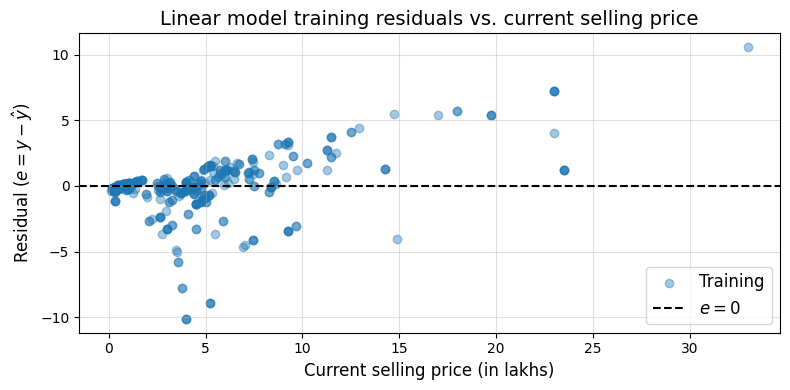

In [20]:
# your code here 
# BEGIN SOLUTION NO PROMPT
# Calculate residuals
residuals = y_train - y_train_pred

# Generate residuals plot as required
plt.figure(figsize=(8, 4))
plt.scatter(y_train, residuals, alpha=0.4, label="Training")
plt.axhline(color="black",linestyle="dashed", label="$e=0$")
plt.title(
    "Linear model training residuals vs. current selling price",
    fontsize=14,
)
plt.xlabel("Current selling price (in lakhs)", fontsize=12)
plt.ylabel("Residual ($e = y - \hat{y}$)", fontsize=12)
plt.legend(fontsize=12, loc=4)
plt.grid(":", alpha=0.4)
plt.tight_layout()
# END SOLUTION

How does the test $MSE$ score compare with the best test $MSE$ value obtained with kNN regression? 




The linear regression test $MSE$ is larger than the best case test $MSE$ (i.e. $k=7$) achieved from $k$NN regression. This makes sense. $k$NN is a non-parametric method, where $k=7$ is going to be far more expressive than a simple linear model. In other words, $k$NN's regression curve can more closely fit to the overall shape of the data, whereas the linear regression curve is restricted to a straight line.

What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?




The positive slope implies that the MRP and the current selling price of a car are positively related. More specifically, the slope of 0.6157 tells us that, for every 1 lakh increase in MRP, on average, we can expect a 0.6157 lakh increase in current selling price.

Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.




The assumption of linearity does not seem to be justified, as the residuals are not scattered randomly around $e=0$ and there is a clear trend exhibited in our residual points! This trend indicates that the model violates the assumption of homoskedasticity. More specifically, the variance of the error terms increase as the values of the response variable increases. This is evidenced by the increasing spread of our residuals as the observed current selling price increases.


    
## PART 2: Analysis of 2021 US Annual Social and Economic (ASEC) Supplement



<a id="part2intro"></a>

## Overview

[Return to contents](#contents)

In this part we analyze *simulated* income data from the publically available 2021 US Annual Social and Economic (ASEC) Supplement (https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.2021.html), provided by the US Census Bureau. The Current Population Survey (CPS) has been conducted monthly for over 50 years. Currently, about 54,000 households are interviewed monthly, scientifically selected on the basis of area of residence to represent the nation as a whole, individual states, and other specified areas. 

### Dataset

The simulated data can be found in `data/census_data.csv`.

The number of features have been greatly reduced from the original dataset. You can see the description of the original dataset in the [ASEC data dictionary](https://www2.census.gov/programs-surveys/cps/datasets/2021/march/asec2021_ddl_pub_full.pdf).

In addition to subsetting the features, other preprocessing steps have been taken. For example, some categorical variables have had their number of unique values reduced. 

We refer to the data as *simulated* because sampling was used to turn what was originally an ordinal response variable (42 income brackets) into something more continous.

Considering this, the results of your analysis should be viewed skeptically. You can view the the preprocessing steps taken to create the simplified, simulated data in `data/preprocessing.ipynb`.

**NOTE:** Variables have been renamed for easier interpretation. You can find the original variable names in the preprocessing notebook. It will be these original variable names that appear in the data dictionary linked above.

### Features
- **age** - Age of person 
- **hourly_pay** - Hourly salary of person (-1 if person is not payed by the hour)
- **hours_per_week** - Number of hours usually worked per week
- **weeks_worked** - Number of weeks worked per year

- **sex** - {'Female': 0,'Male': 1} 
- **marital_status** - {'married':0,'widowed':1,'Divorced':2, 'Separated':3,'Never married':4}
- **military_service** - {'has not served in the US armed forces':0,'has served in the US armed forces':1}
- **student_status** - {'Not currently studying':0,'Enrolled full-time':1, 'Enrolled part-time':1}
- **education** - {'Not finished high school': 0, 'High school': 1, 'Associate degree': 2, 'Bachelor\'s': 3, ,'Master\'s': 4,'Professional school degree': 5', Doctorate': 6}

- **race** - {'White': 0, 'Black': 1, 'American Indian, Alaskan Native only (AI)': 2, 'Asian': 3, ,'Hawaiian, Pacific Islander (HP)': 4,'White-Black': 5', 'White-AI': 6, 'White-Asian': 7, 'White-HP': 8, 'Black-AI': 9, 'Black-Asian': 10, 'Black-HP': 11, 'AI-Asian': 12, 'AI-HP': 13, 'Asian-HP': 14, 'other race combinations': 15}

- **industry** - Industry that the person is working in {'Other': 0, 'Agriculture, forestry, fishing, hunting': 1, 'Mining': 2, 'Construction': 3, ,'Manufacturing': 4,'Wholesale and retail trade': 5','Transportation and utilities': 6, 'Information': 7, 'Financial activities': 8, 'Professional and business services': 9, 'Education and health services': 10, 'Leisure and hospitality': 11, 'Other services': 12, 'Public administration': 13, 'Armed Forces': 14}

- **occupation** - Occupation of person {'Other': 0, 'Management, business, and financial occ.': 1, 'Professional and related occ.': 2, 'Service occ.': 3, ,'Sales and related occ.': 4,'Office and administrative support occ.': 5','Farming, fishing and forestry': 6, 'Construction and extraction occ.': 7, 'Installation, maintenance and repair occ.': 8, 'Production occ.': 9, 'Transportation and material moving occ.': 10, 'Armed Forces': 11}


- **income** - Annual income in dollars



## Question 4: Investigating trends



Is there a disparity in income of participants by gender? Consider using a log scale or another technique when plotting to communicate findings more clearly.



In [21]:
# your code here
# BEGIN SOLUTION NO PROMPT
df = pd.read_csv("data/census_data.csv", index_col=0) 
# Data dictionary says hourly pay has 2 implied decimals
# -1 means not paid by the hour
# This could also be addressed by simply adjusting plot ticks later 
df['hourly_pay'] = df['hourly_pay'].apply(lambda x: -1 if x == -1 else x/100)
df.head()
# END SOLUTION

,age,weeks_worked,hours_per_week,hourly_pay,student_status,education,marital_status,sex,military_service,race,industry,occupation,is_paid_by_hour,person_record,income
0,56,0,0,-1.0,0,1,0,0,0,0,0,0,0,2,1528.04
1,57,26,40,-1.0,0,1,0,1,0,0,3,7,0,2,13728.07
2,78,0,0,-1.0,0,1,1,0,0,0,0,0,0,2,14247.51
3,65,52,40,-1.0,0,3,0,0,0,0,10,2,2,2,45486.23
4,66,49,40,-1.0,0,1,0,1,0,0,6,10,2,2,34436.61


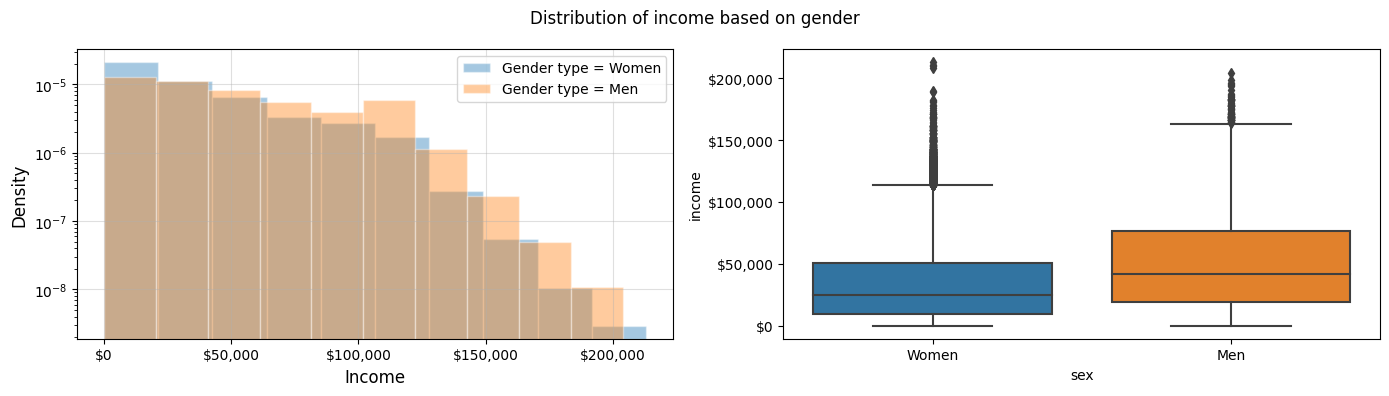

In [22]:
# BEGIN SOLUTION NO PROMPT
# This will nicely format dollar amounts in plots 
from matplotlib import ticker
fmtr = ticker.StrMethodFormatter('${x:,g}')

gendermap = {0:"Women", 1:"Men"}

fig, axes = plt.subplots(1,2, figsize=(14,4))
for i in gendermap.keys():
    axes[0].hist(
        df[df.sex==i].income,
        log=True,
        label = f"Gender type = {gendermap[i]}",
        alpha=0.4,
        bins = 10,
        density=True,
        edgecolor="w",
    )
    axes[0].legend(loc="best")
    axes[0].set_xlabel("Income", fontsize=12)
    axes[0].set_ylabel("Density", fontsize=12)
    axes[0].grid(":", alpha=0.4)
    
sns.boxplot(data=df, x='sex', y='income', ax=axes[1])
axes[1].set_xticklabels(gendermap.values())
# format income ticks 
axes[0].xaxis.set_major_formatter(fmtr)
axes[1].yaxis.set_major_formatter(fmtr)

plt.suptitle("Distribution of income based on gender")
plt.tight_layout()
# END SOLUTION

**INTERPRETATION:**


Women are over-represented in the lowest incomes while more men are high income earners. We can also see in the boxplot that men have a higher median income.

Is there a relationship between income and the "occupation" variable? 


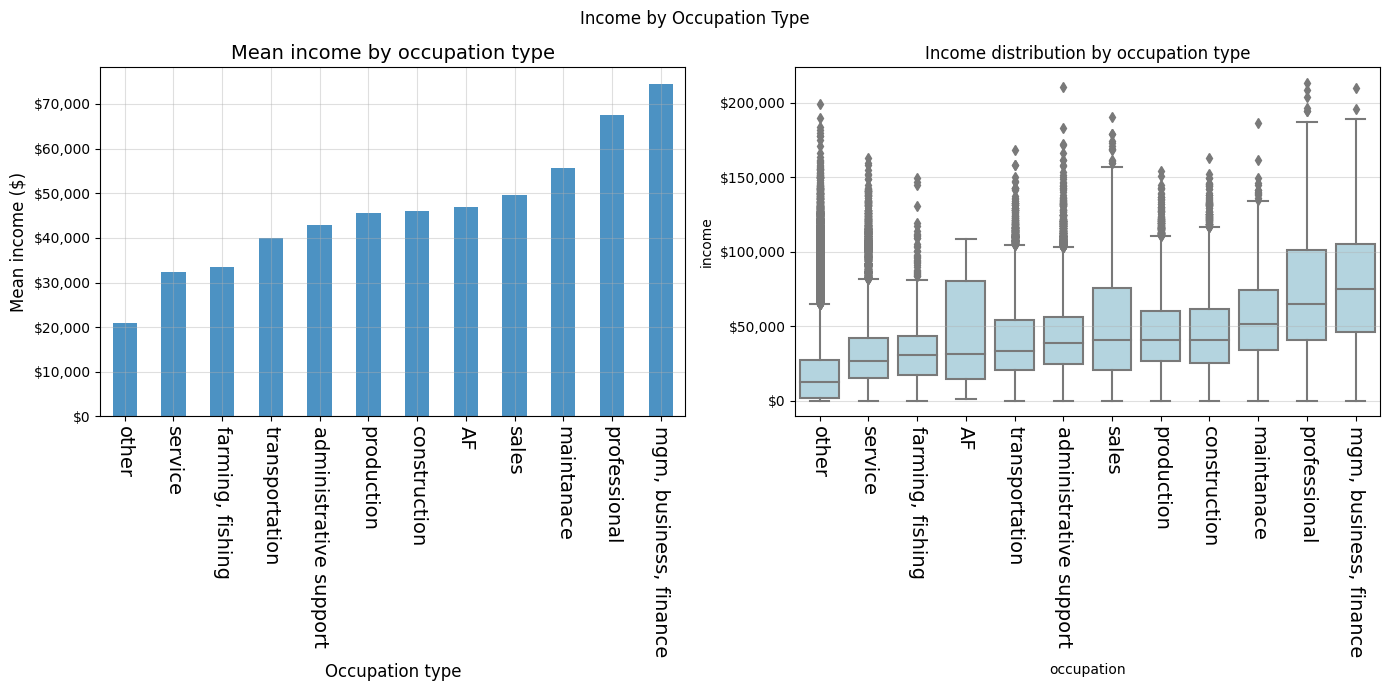

In [23]:
# your code here
# BEGIN SOLUTION NO PROMPT
fig, axes = plt.subplots(1,2, figsize=(14,7))
plt.grid(":", alpha=0.4)

occupation_dict = {0: 'other', 
                   1 : 'mgm, business, finance', 
                   2: 'professional',
                   3: 'service', 
                   4: 'sales', 
                   5: 'administrative support', 
                   6: 'farming, fishing',
                   7: 'construction', 
                   8: 'maintanace', 
                   9: 'production', 
                   10: 'transportation', 
                   11: 'AF' }

# Bar Plot
# sort occupations by mean
sorted_incomes = df.groupby(["occupation"]).mean().income.sort_values()
sorted_incomes.plot(kind="bar", alpha=0.8, ax=axes[0])

axes[0].set_xticklabels(
    [occupation_dict[i] for i in sorted_incomes.index],
    rotation=270,
    fontsize=14
)
axes[0].set_xlabel("Occupation type", fontsize=12)
axes[0].set_title("Mean income by occupation type", fontsize=14)
axes[0].set_ylabel("Mean income ($)", fontsize=12)
axes[0].grid(":", alpha=0.4)

# Box Plot
# sort occupations by median
occ_median_sorted = df.groupby(["occupation"]).median().income.sort_values()

sns.boxplot(data=df,
            x='occupation',
            y='income',
            color='lightblue',
            order=occ_median_sorted.index,
            ax=axes[1])
axes[1].set_xticklabels([occupation_dict[x] for x in occ_median_sorted.index],
                       rotation=270, fontsize=14)
axes[1].set_title("Income distribution by occupation type")
for ax in axes:
    ax.yaxis.set_major_formatter(fmtr)
plt.suptitle("Income by Occupation Type")
plt.tight_layout()
# END SOLUTION

**INTERPRETATION:**



Clearly some occupations earn more on average than others, though identifying a trend requires looking for similarities in nearby occupations in the ranking. It seems that service jobs are on the lower end while management and buisness jobs are at the higher end. Armed forces (AF) is an odd case in that the upper 50% reach some high salaries. This can be seen by the fact that AF is relatively low in the boxplot chart which is ranked by median, and significantly higher in the bar plot which is ranked by mean. Note too that the mean for AF is *not* being pulled up by "outliers" as there are none shown in the box plot. 

Let's investigate a few questions about education and income:
- Is there a relationship between income and education level? 

- Is this trend similar across both genders in the dataset? 

- Is it possible to consider education level as an ordinal variable? For instance, consider whether retaining the numerical ordering in the dataset might be preferable to education level as a categorical variable lacking order. 


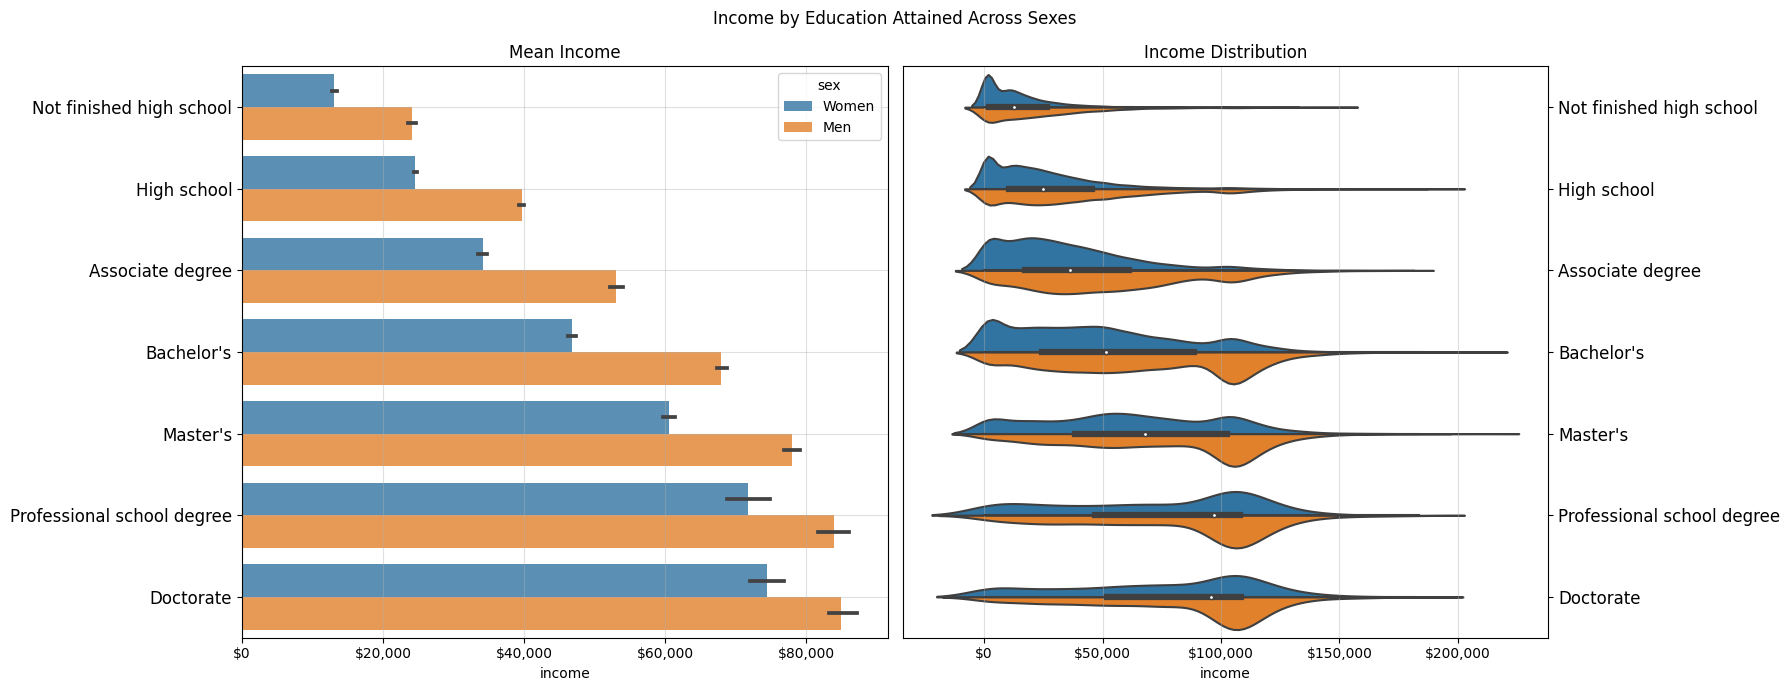

In [24]:
# your code here
# BEGIN SOLUTION NO PROMPT
fig, axes = plt.subplots(1,2, figsize=(18,7))
ed_dict = {0: 'Not finished high school',
             1: 'High school',
             2: 'Associate degree',
             3: "Bachelor's",
             4: "Master's",
             5: 'Professional school degree',
             6: 'Doctorate'}
ax = plt.gca()
sns.barplot(data=df.replace({'sex':gendermap}), y='education', x='income',
            alpha=0.8, orient='h', ax=axes[0],hue='sex'
)
axes[0].set_title("Mean Income")
plt.grid(":", alpha=0.4)

axes[0].set_xlabel("income")
axes[0].set_ylabel(None)
axes[0].grid(":", alpha=0.4)

sns.violinplot(data=df.replace({'sex': gendermap}), y='education', x='income', hue='sex',
               orient='h', split=True, alpha=0.4, ax=axes[1])
axes[0].set_yticklabels([ed_dict[int(i.get_text())] for i in axes[0].get_yticklabels()],
                       fontsize=12,
                       rotation=0)
axes[1].set(ylabel=None, title="Income Distribution")
axes[1].legend([],[], frameon=False)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set_yticklabels([ed_dict[int(i.get_text())] for i in axes[1].get_yticklabels()],
                       fontsize=12)
for ax in axes:
    ax.xaxis.set_major_formatter(fmtr)
plt.suptitle("Income by Education Attained Across Sexes")
plt.tight_layout()
# END SOLUTION

**INTERPRETATION:**



As might be expected, higher educational attainment is associated with increased incomes. The general trend is the same for both men and women though women earn less on average at every level of educational attainment. This disparity particularly pronounced when we look at the income distributions for Bachelor's degree in the split violin plot to the right.

It is true that educational attainment has a natural ordering, and so *could* be treated as an ordinal rather than a categorical variable. But treating it as an ordinal variable with values 1, 2, 3, etc. assumes that the 'distance' between the values is the same (e.g., 2 is to 1 as 3 is to 2, etc.). But this may not be the case.

Is there a discernable trend in the incomes of participants from different industries?


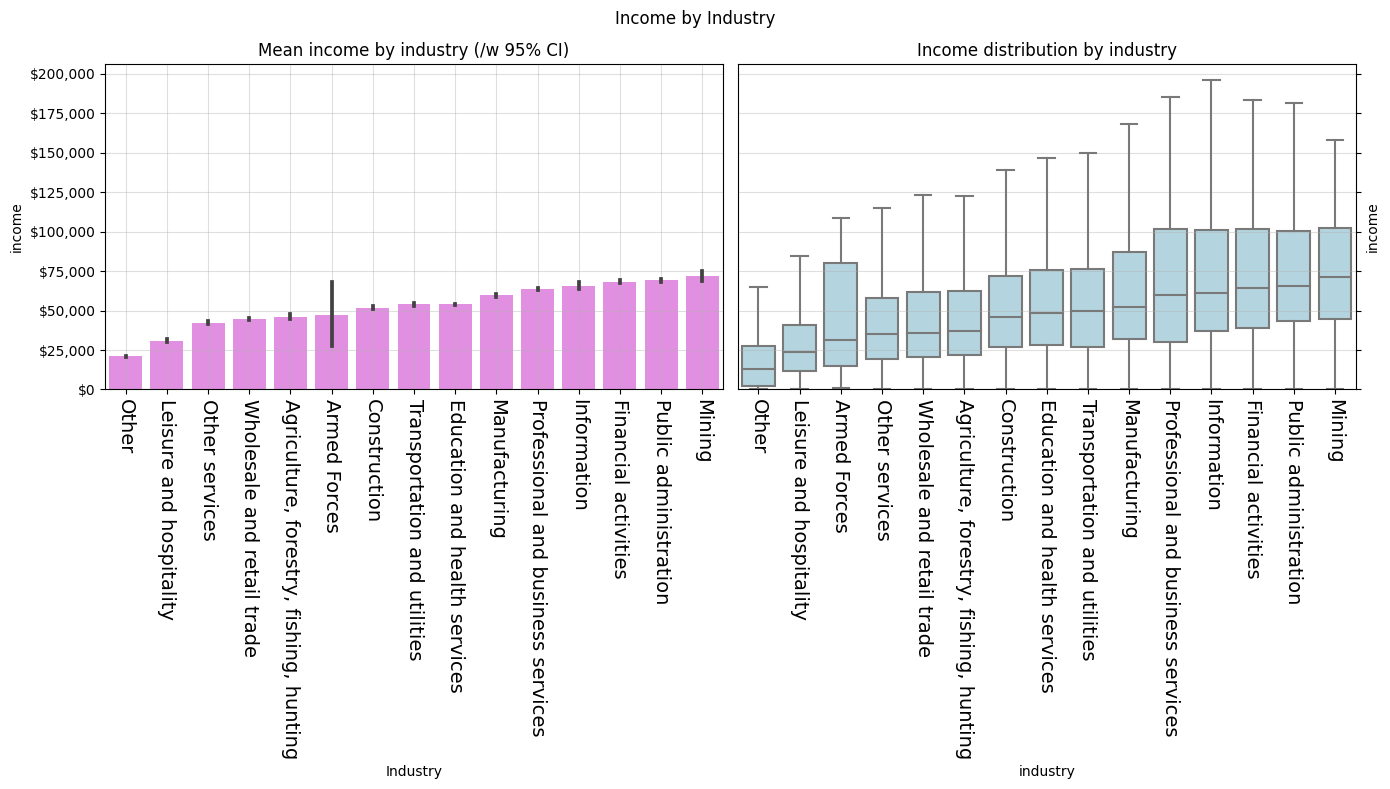

In [25]:
# your code here
# BEGIN SOLUTION NO PROMPT
fig, axes = plt.subplots(1,2, figsize=(14,8), sharey=True)
plt.grid(":", alpha=0.4)

ind_dict = {0: 'Other',
            1: 'Agriculture, forestry, fishing, hunting',
            2: 'Mining',
            3: 'Construction',
            4: 'Manufacturing',
            5: 'Wholesale and retail trade',
            6: 'Transportation and utilities',
            7: 'Information',
            8: 'Financial activities',
            9: 'Professional and business services',
            10: 'Education and health services',
            11: 'Leisure and hospitality',
            12: 'Other services',
            13: 'Public administration',
            14: 'Armed Forces'}

# Bar Plot
# sort occupations by mean
sorted_incomes = df.groupby(["industry"]).mean().income.sort_values()
# sorted_incomes.plot(kind="bar", alpha=0.8, ax=axes[0])
sns.barplot(data=df,
            x='industry',
            y='income',
            color='violet',
            order=sorted_incomes.index,
            ax=axes[0])

axes[0].set_xticklabels(
    [ind_dict[i] for i in sorted_incomes.index],
    rotation=270,
    fontsize=14
)
axes[0].set_xlabel("Industry")
axes[0].set_title("Mean income by industry (/w 95% CI)")
axes[0].set_ylabel("income")
axes[0].grid(":", alpha=0.4)

# Box Plot
# sort occupations by median
occ_median_sorted = df.groupby(["industry"]).median().income.sort_values()

sns.boxplot(data=df,
            x='industry',
            y='income',
            color='lightblue',
            showfliers=False,
            order=occ_median_sorted.index,
            ax=axes[1])
axes[1].set_xticklabels([ind_dict[x] for x in occ_median_sorted.index],
                       rotation=270, fontsize=14)
axes[1].set_title("Income distribution by industry")
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
for ax in axes:
    ax.yaxis.set_major_formatter(fmtr)
plt.suptitle("Income by Industry");
plt.tight_layout()
# END SOLUTION

**INTERPRETATION:**



Once again we see service jobs at the lower end of the incomes with buisiness and management jobs at the high end. Mining is perhaps surprising to see at the top as it doesn't look like any of the nearby industries in the ranking. Again, notice the long 50th-percentile in the boxplot for armed forces. This matches what we saw earlier when examining income by occupation. We also see that armed forces has a very large 95% confidence interval (produced by Seaborn using bootstraped datasets) for the mean.

Is there a clear trend between age and income?


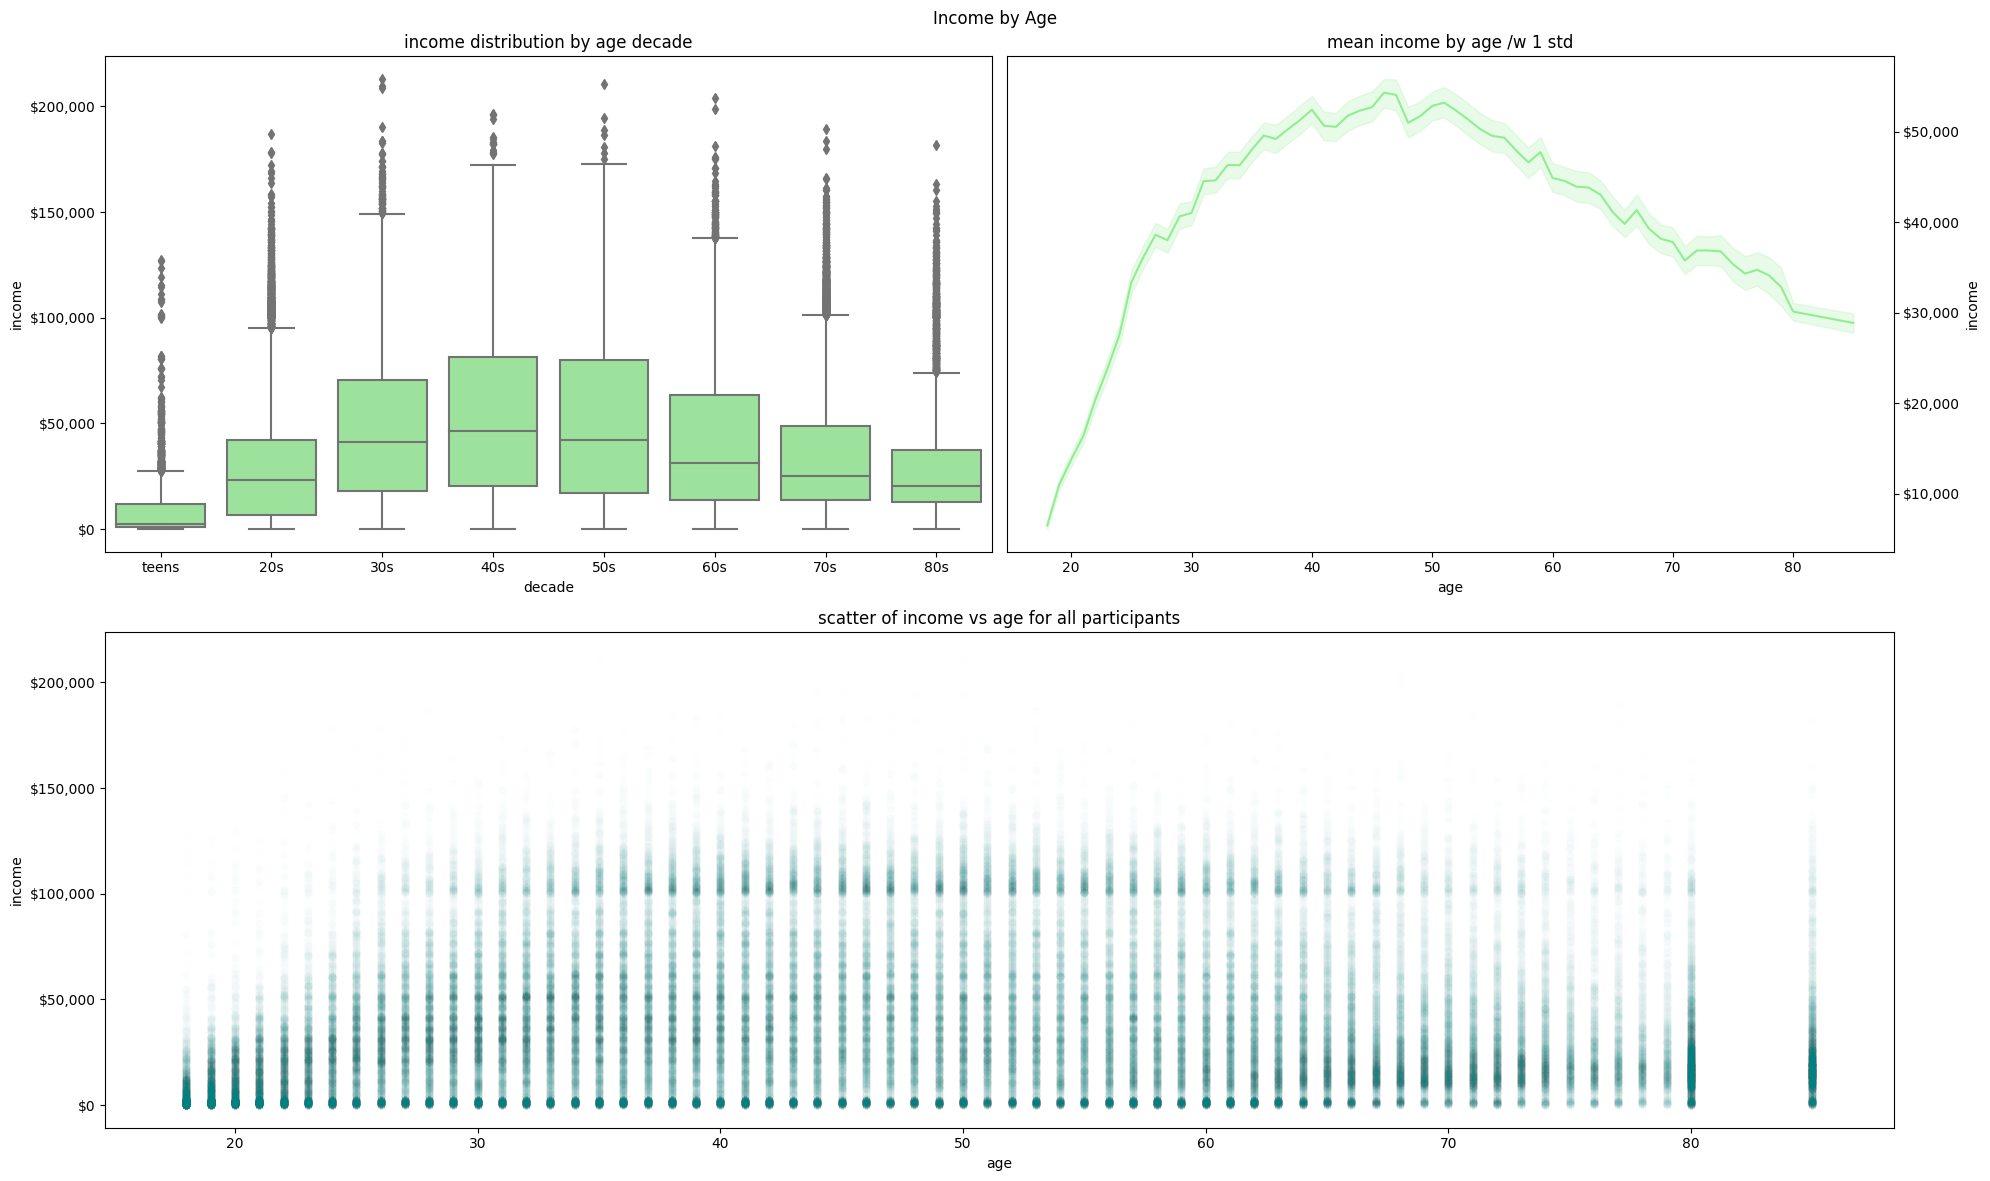

In [26]:
# your code here
# BEGIN SOLUTION NO PROMPT
fig, axes = plt.subplot_mosaic('AB;CC', figsize =(20,12))
# Box Plot
age_df = df.loc[:,['age','income']]
age_df.loc[:,'decade'] = age_df.loc[:,'age']//10*10
sns.boxplot(data=age_df, x='decade', y='income', color='lightgreen', ax=axes['A'])
cur_xticklabels =  axes['A'].get_xticklabels()
decade_labels = [f"{l.get_text()}s" if (int(l.get_text()) > 10) else 'teens'for l in cur_xticklabels]
axes['A'].set_xticklabels(decade_labels)
axes['A'].set_title("income distribution by age decade")

# Line Plot
sns.lineplot(data=df, x='age', y='income', color='lightgreen', ax=axes['B']);
axes['B'].yaxis.set_label_position("right")
axes['B'].yaxis.tick_right()
axes['B'].set_title("mean income by age /w 1 std")
    
# Scatter Plot
sns.scatterplot(data=df, x='age', y='income', color='teal', alpha=0.006, ax=axes['C'])
axes['C'].set_title(
    "scatter of income vs age for all participants",
)
# format income axes labels as dollars
for ax in axes.values():
    ax.yaxis.set_major_formatter(fmtr)
plt.suptitle("Income by Age")
plt.tight_layout()
# END SOLUTION

**INTERPRETATION:**


There is a definite relationship between age and income (as we would expect), but this is difficult to see if you only use a scatter plot, even with the alpha set very low, as there are so many data points. The boxplot grouped by decade shows that median incomes first rise with age, peaking in the 40s and 50s, before declining in later years as people retire or become unable to work. The 40s and 50s also show the biggest variation among incomes. The line plot of the mean income by age with a 1 standard deviation provides the same insights as the boxplot. Note the strange 'streak' at $100,000 in the scatter plot. This is almost certainly an artifact introduced by the exponential distribution sampling used in the data simulation process. 

Do any of the quantitative attributes show a clear relationship with income? If so, are these relationships linear or non-linear?


c:\Users\diasrodr\Anaconda3\envs\ml\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\diasrodr\AppData\Local\Temp\ipykernel_4412\3974316729.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


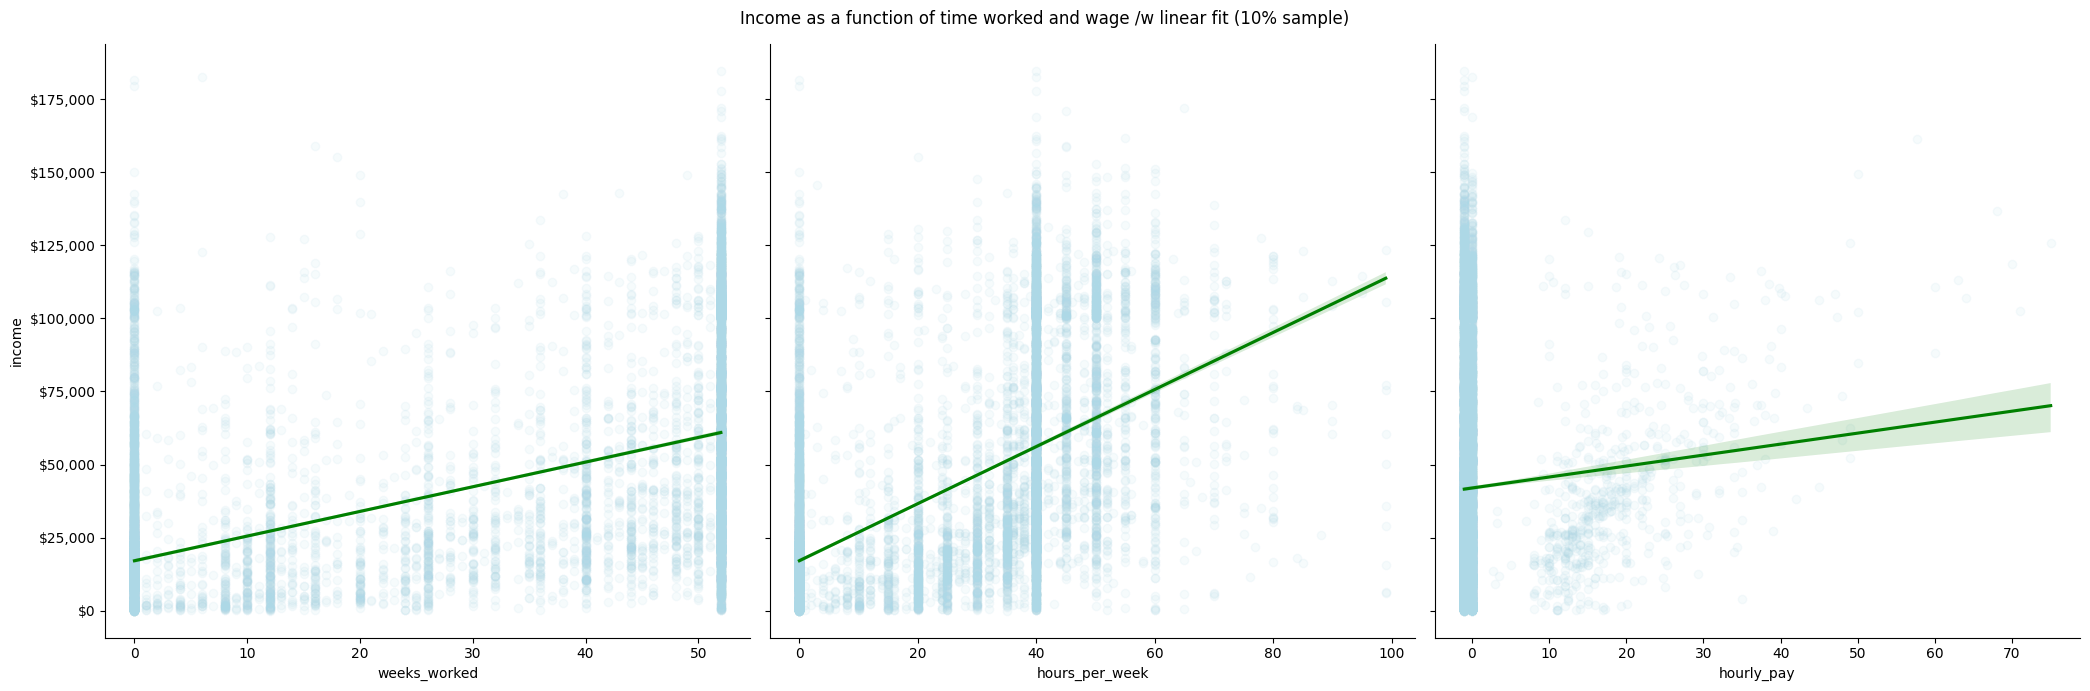

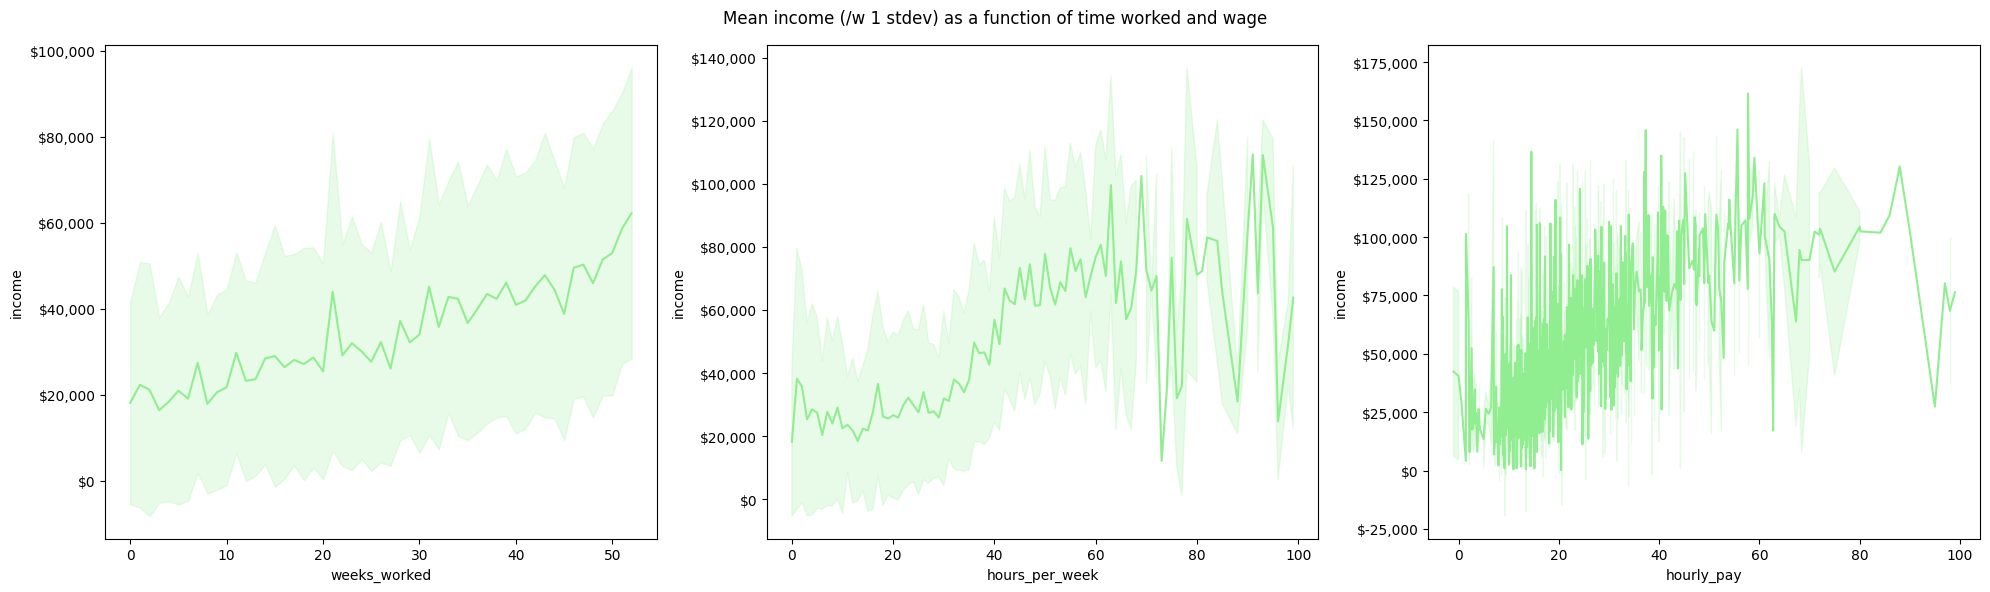

In [27]:
# your code here
# BEGIN SOLUTION NO PROMPT
sns.pairplot(data = df.sample(frac=0.1),
             x_vars = ["weeks_worked", "hours_per_week", "hourly_pay"],
             y_vars = "income", 
             kind = "reg",
             plot_kws={'line_kws': {'color':'green'},
                       'scatter_kws': {'alpha': 0.1, 'color': 'lightblue'}},
             height=7
            )
plt.gca().yaxis.set_major_formatter(fmtr)
plt.suptitle("Income as a function of time worked and wage /w linear fit (10% sample)")
plt.tight_layout()
fig, axes = plt.subplots(1,3, figsize =(20,6))
cols = ["weeks_worked", "hours_per_week", "hourly_pay"]
for i, c in enumerate(cols):
    sns.lineplot(data=df, x=c, y='income', errorbar='sd', color='lightgreen', ax=axes[i]);
    axes[i].yaxis.set_major_formatter(fmtr)
plt.suptitle("Mean income (/w 1 stdev) as a function of time worked and wage")
plt.tight_layout()
# END SOLUTION

**INTERPRETATION:**



The linear fits in the pair plots show that there are general positive trends with both time worked and wage with income (as was expected). But closer inspection of the scatter plot points and line plots show that this relationship is close to linear only for `weeks_worked` and even then it is only an approximation. With `hours_per_week` there seems to be no relationship until about the 30 to 45 hour range, in which we see an increase in income but after this the relationship again disappears, with the line plot becoming increasingly noisey due to the sparseness of data points above 70 hours worked per week (I guess that's not very common?). Perhaps this is due to people working 30-45 hours being labeled 'full time' and actually having a different job title with statistically higher wages than those part-time employees working fewer hours. You can see something like this trend if you explore `hourly_pay` as a function of `hours_per_week` on your own, though it seems that the relationship is *negative* for the chronically over-worked. The information on the relationship between `hourly_pay` and `income` is very noisey, though there does seem to be a steep positive trend in the \\$10- to \\$35-an-hour range with the trend vanishing after that.

What is the relationship between income and the different values for `marital_status` in the dataset?


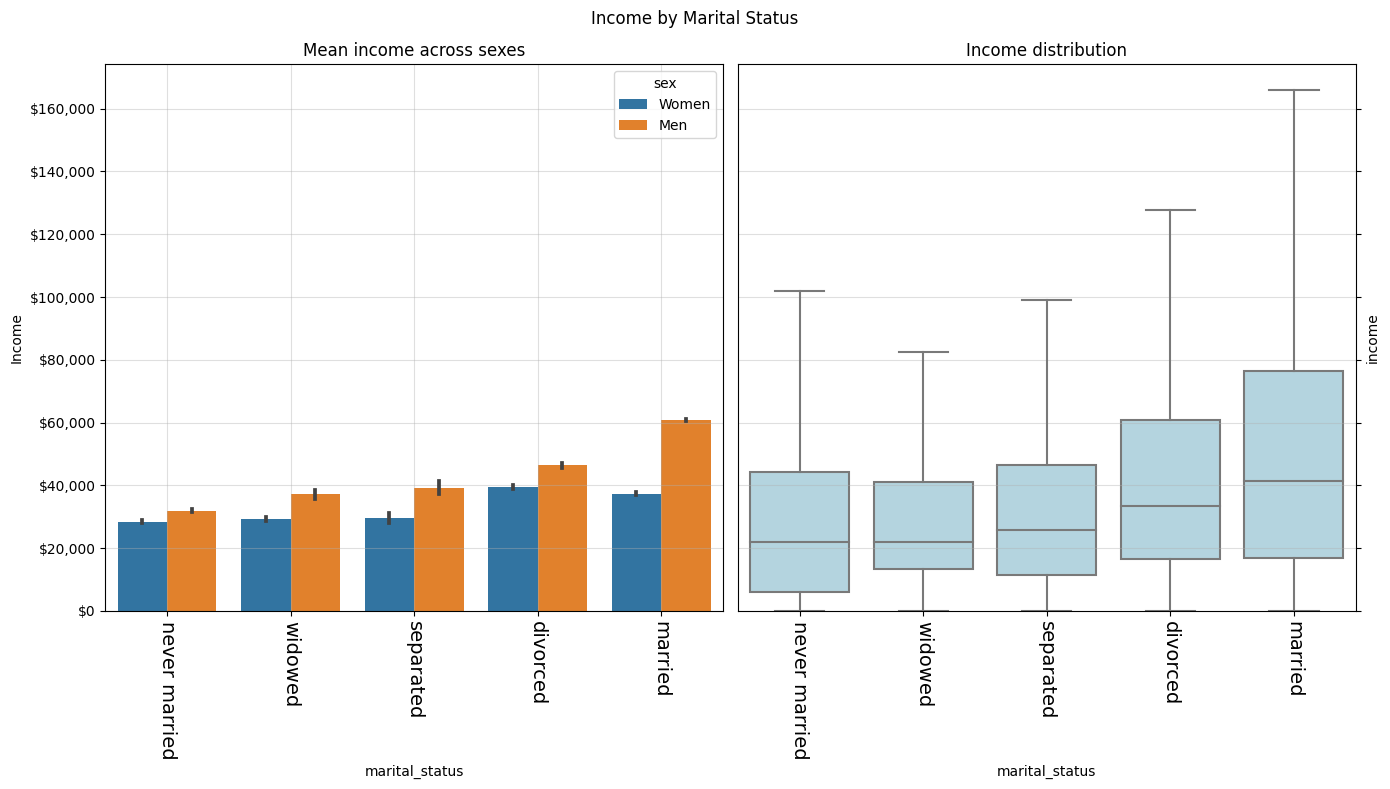

In [28]:
# your code here
# BEGIN SOLUTION NO PROMPT
fig, axes = plt.subplots(1,2, figsize=(14,8), sharey=True)
plt.grid(":", alpha=0.4)
marital_dict = {0: 'married', 1: 'widowed', 2: 'divorced', 3: 'separated', 4: 'never married'}

# Bar Plot
# sort occupations by mean
sorted_incomes = df.groupby(["marital_status"]).mean().income.sort_values()
# sorted_incomes.plot(kind="bar", alpha=0.8, ax=axes[0])
sns.barplot(data=df.replace({'sex': gendermap}),
            x='marital_status',
            y='income',
            order=sorted_incomes.index,
            hue='sex',
            ax=axes[0])

axes[0].set_xticklabels(
    [marital_dict[i] for i in sorted_incomes.index],
    rotation=270,
    fontsize=14
)
axes[0].set_title("Mean income across sexes")
axes[0].set_ylabel("Income")
axes[0].grid(":", alpha=0.4)

# Box Plot
# sort occupations by median
marital_median_sorted = df.groupby(["marital_status"]).median().income.sort_values()

sns.boxplot(data=df,
            x='marital_status',
            y='income',
            color='lightblue',
            # hue='sex',
            order=marital_median_sorted.index,
            showfliers=False,
            ax=axes[1])
axes[1].set_xticklabels([marital_dict[x] for x in marital_median_sorted.index],
                       rotation=270, fontsize=14)
axes[1].set_title("Income distribution")
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
for ax in axes:
    ax.yaxis.set_major_formatter(fmtr)
plt.suptitle("Income by Marital Status");
plt.tight_layout()
# END SOLUTION

**INTERPRETATION:**



The box plot suggests a clear heirarchy in terms of median income earned: married > divorced > separated > widowed > never married. But look at the bar plot showing the mean income by marital status where we separate the sexes. This heirarchy is even more exaggerated for the men (in part due to the mean being more sensitive to high outliers), but we see that married women actually earn *less* on average than divorced women and only marginally more than those women who are separate, widowed, or have never married.

What is the average effect of the `military_service` variable on income?


In [29]:
# your code here
# BEGIN SOLUTION NO PROMPT
x = df[["military_service"]]
y = df["income"]
model = LinearRegression()
service_model = model.fit(x,y)

coef = service_model.coef_[0]

print(
    f"Those with military service earn, on average, ${np.abs(coef):,.2f} "
    f"{'more' if coef>0 else 'less'} per year compared to those who have never served in the military "
)
# END SOLUTION

Those with military service earn, on average, $10,654.21 more per year compared to those who have never served in the military 


**INTERPRETATION:**


While those who have served in the military showed a higher average income then those who did not, this is likely the case for those who served in the *past*, considering the fact that "armed forces" was one of the lowest earning jobs when we explored the relationship between industry and income earlier.

<!-- END QUESTION -->

<a id="part5questions"></a>

## <div class='exercise'><b>Question 5:  Calculate the Gini coefficient </b></div>

[Return to contents](#contents)


**Gini coefficients are often used to quantify income inequality.** For an introductory overview of the Gini coefficient, its derivation, and its uses, you can [read more about it here](https://en.wikipedia.org/wiki/Gini_coefficient). That article also provides [a useful graphical representation](https://en.wikipedia.org/wiki/File:Economics_Gini_coefficient2.svg) of the Gini coefficient to better understand how it measures inequality. 

The Gini coefficient is defined by the formula:

$$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini coefficient of $G=0$ implies perfect income equality, whereas a Gini coefficient close to $G=1$ implies a concentration of wealth among the richest few.

Based on the above formula, calculate and report the Gini coefficient for the income of those people in the the provided ASEC dataset. Store the result in `gini_coef`.

- **NOTE:** For algorithmic simplicity and consistency, you can rank income values for all observations, keeping duplicate values in your sorted array. Therefore, you will likely have sorted income values $x_i$ similar to `[417, 417, 417, ..., 250000, 250000, 250000]` with corresponding rank indices $i$ similar to `[1, 2, 3, ..., 12353, 12354, 12355]`. Nothing more sophisticated than that is required for dealing with ties (i.e. duplicates) in your sorted income values for Question 5.1.


In [30]:
# your code here
# BEGIN SOLUTION NO PROMPT
def gini(array, verbose=False):
    """Calculate the Gini coefficient of a numpy array
    
    :param array: np.array, 1D array of income values
    :return: float, gini coefficient value
    
    .. note::
    
       - Based on bottom equation here:
         - http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
       - ...from:
         - http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
       - All values are sorted and treated equally.
    """
    array = array.flatten().astype("float64")
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    
    if verbose:
        # Printed sort array and indices for illustrative purposes only
        # These print statements are not required, but are provided
        # for clarity when referring to this implementation.
        print(f"Ranked income values in ascending order: {array}\n")
        print(f"Corresponding rank indices: {index}\n")
    
    # Return gini coefficient
    return (
        (np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))
    )
# Calculate gini with verbose True to illustrate sorting approach
# END SOLUTION
gini_coef = gini(df["income"].values, verbose=True) # SOLUTION

Ranked income values in ascending order: [1.09000010e+00 1.54000010e+00 1.99000010e+00 ... 2.09506924e+05
 2.10424111e+05 2.12965037e+05]

Corresponding rank indices: [     1      2      3 ... 121843 121844 121845]



In [31]:
# Print resulting Gini coefficient
print(
    f"The Gini Index for this dataset is {gini_coef:.3f}")

The Gini Index for this dataset is 0.473


According to the [World Bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the country with the largest Gini coefficient is South Africa, ranked 1st at $0.63$, while the lowest is the Slovak Republic, ranked 162nd at $0.232$. The United States is ranked 46th on the list and has a Gini index of $0.415$.

- How well does your calculated Gini coefficient for this simulated dataset match the world bank estimate?

- Might the self-report nature of the data, preprocessing steps, or simulation (i.e., sampling) procedure have affected your results? If so, how?

**Note:** The World Bank estimate website uses a [0,100] range for the Gini Index. Above we have converted this to a [0,1] range.


**INTERPRETATION:**



The Gini coefficient calculated from our simulated data is higher (more unequal) than the World Bank estimate. This could be due to the exponential distribution we sampled from to simulate the incomes of the highest bracket ($100,000+). If the the parameter of the exponential distribution used doesn't match the underlying reality (or if the distribution is *not* in fact exponential) and the tail of the simulated income distribution ends up being longer than the true distribution (which is supposedly more accurately measured by the World Bank) then this would inflate our Gini coefficient. There is also the possibility that, if those with higher incomes are more likely to exaggerate their true incomes in this self reported survey data, then this would also exaggerate the perceived inequality and inflate the Gini coefficient. 



## Question 6:  Critiquing the simulated data [5 pts]


Take a look at both the [data dictionary for the original dataset](https://www2.census.gov/programs-surveys/cps/datasets/2021/march/asec2021_ddl_pub_full.pdf) and the notebook used to create the simplified simulation, `data/preprocessing.ipynb`. 

What might you have done differently were you to write your own preprocessing code?
A nonexhaustive list of a few things to consider would be:
- Are there important features you think should have been included that were not? 
- Do you agree with the methods used to reduce the number of unique categorical values?
- Might there be a better way to simulate a continuous response from the discrete income brackets in the original data?

**Note:** We used the record type 'person' data from the ASEC rather than 'household' or 'family.' All three record types are represented in the data dictionary.



**INTERPRETATION:**


- The original dataset had *many* predictors, several of which would likely have proved insightful if included as they are almost certainly related to income. These include predictors related to geographic location or living in an urban setting. Incomes certainly depend on one's location. There are also several predictors related to different disabilities (visual impairment, compromised mobility, etc.) and it would be worthwhile exploring how these affect income.

- The collapsing of some of the race categories here could perhaps be justified by the fact that there were so few individuals in the dataset who identified as three or more races. But one should keep in mind that many datasets we find in the wild may have already undergone some sort of category reduction based on subjective ideas about similarity, and such decisions may not be divulged to the end user.

- The exponential distribution sampling for individuals in the highest income bracket is certainly problematic. Consider the fact that individuals in the $100k+ bracket are mapped to wildly different incomes (e.g., \\$101k vs \\$200k) all by random chance, having nothing to do with their other predictors. This will certainly compromise modeling as features associated with those mapped to the highest incomes will be considered to be predictive of high income when the mapping was in fact arbitrary. 